<a href="https://colab.research.google.com/github/antoniodeepblue/Proyecto-final-de-analista-de-datos-de-IBM/blob/main/Copia_de_Web_Scraping_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br>


In [ ]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [ ]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage

Download the webpage at the url


In [ ]:
#your code goes here
data  = requests.get(url).text

In [ ]:
print(data)

<!doctype html>
<html lang="en">
<head>
<title>
Salary survey results of programming languages
</title>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>

<body>
<hr />
<h2>Popular Programming Languages</h2>
<hr />
<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>
<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>
<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that the results vary yea

Create a soup object


In [ ]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Podemos utilizar el método prettify()para mostrar el HTML en la estructura anidada:

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Salary survey results of programming languages
  </title>
  <style>
   table, th, td {
  border: 1px solid black;
}
  </style>
 </head>
 <body>
  <hr/>
  <h2>
   Popular Programming Languages
  </h2>
  <hr/>
  <p>
   Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.
  </p>
  <p>
   There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.
  </p>
  <p>
   Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When usin

In [ ]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

Scrape the `Language name` and `annual average salary`.


**Trabajando en una tabla HTML**

Estas son las siguientes etiquetas que se utilizan al crear tablas HTML.

`<table>` : esta etiqueta es una etiqueta raíz que se utiliza para definir el inicio y el final de la tabla. Todo el contenido de la tabla está incluido dentro de estas etiquetas.

`<tr>` : Esta etiqueta se utiliza para definir una fila de la tabla. Cada fila de la tabla se define dentro de esta etiqueta.

`<td>` : esta etiqueta se utiliza para definir una celda de tabla. Cada celda de la tabla se define dentro de esta etiqueta. Puede especificar el contenido de la celda entre las etiquetas de apertura y cierre.

`<th>` : esta etiqueta se utiliza para definir una celda de encabezado en la tabla. La celda de encabezado se utiliza para describir el contenido de una columna o fila. De forma predeterminada, el texto dentro de una etiqueta aparece en negrita y centrado.

`<tbody>` : es el contenido principal de la tabla, que se define mediante la etiqueta. Contiene una o más filas de elementos.

In [ ]:
#tu código va aquí
for row in table.find_all('tr'): # En la fila de la tabla HTML se representa mediante la etiqueta <tr>
    # Obtenga todas las columnas de cada fila.
    cols = row.find_all('td') # En html, una columna está representada por la etiqueta <td>
    name = cols[2].getText() # almacene el valor de la columna 3 como name
    salary = cols[3].getText() # Guarde el valor de la columna 4 como salary
    print("{}--->{}".format(name,salary))

Created By--->Average Annual Salary
Guido van Rossum--->$114,383
James Gosling--->$101,013
Robert Gentleman, Ross Ihaka--->$92,037
Netscape--->$110,981
Apple--->$130,801
Bjarne Stroustrup--->$113,865
Microsoft--->$88,726
Rasmus Lerdorf--->$84,727
Donald D. Chamberlin, Raymond F. Boyce.--->$84,793
Robert Griesemer, Ken Thompson, Rob Pike.--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


Guarde los datos desechados en un archivo llamado popular-languages.csv

In [ ]:
# Opcion 1
# Primero aislamos el cuerpo de la tabla que contiene toda la información
# Luego recorremos cada fila y encontramos todos los valores de columna para cada fila
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    languages = col[1].text
    name = col[2].text
    salary = col[3].text
    Level= col[4].text
    print("{}--->{}".format(date,languages))



No.--->Language
1--->Python
2--->Java
3--->R
4--->Javascript
5--->Swift
6--->C++
7--->C#
8--->PHP
9--->SQL
10--->Go


In [ ]:
import pandas as pd
data2 = pd.DataFrame(columns=["Date", "languages", "name", "salary", "Level"])

In [ ]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    languages = col[1].text
    name = col[2].text
    salary = col[3].text
    Level= col[4].text
    # Finally we append the data of each row to the table
    data2 = pd.concat([data2,pd.DataFrame({"Date":[date], "languages":[languages], "name":[name], "salary":[salary], "Level":[Level]})], ignore_index=True)

In [ ]:
data2.head(11)


,Date,languages,name,salary,Level
0,No.,Language,Created By,Average Annual Salary,Learning Difficulty
1,1,Python,Guido van Rossum,"$114,383",Easy
2,2,Java,James Gosling,"$101,013",Easy
3,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
4,4,Javascript,Netscape,"$110,981",Easy
5,5,Swift,Apple,"$130,801",Easy
6,6,C++,Bjarne Stroustrup,"$113,865",Hard
7,7,C#,Microsoft,"$88,726",Hard
8,8,PHP,Rasmus Lerdorf,"$84,727",Easy
9,9,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793",Easy


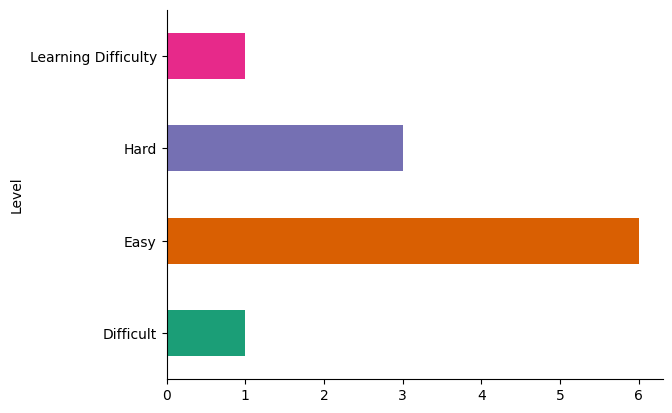

In [ ]:
# @title Level

from matplotlib import pyplot as plt
import seaborn as sns
data2.groupby('Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-14-feb8c234d4fc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='languages', y='salary', data=df_sorted, palette='viridis')


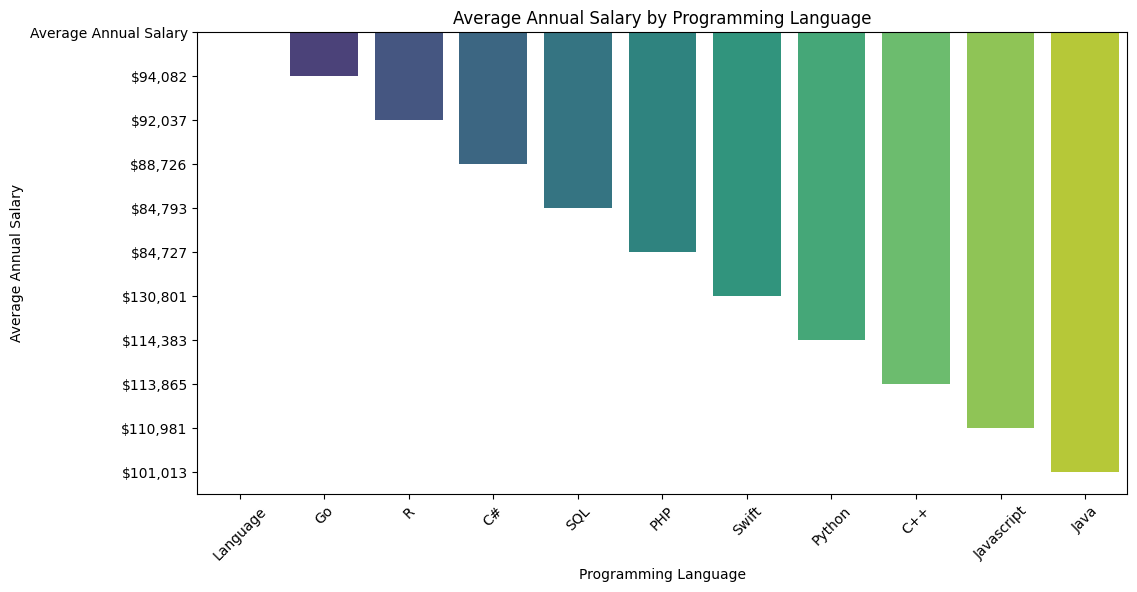

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Sort the DataFrame by Average Annual Salary in descending order
df_sorted = data2.sort_values(by='salary', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='languages', y='salary', data=df_sorted, palette='viridis')
plt.title('Average Annual Salary by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Annual Salary')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-1905e0642089>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='languages', y='Level', data=df_sorted, palette='viridis')


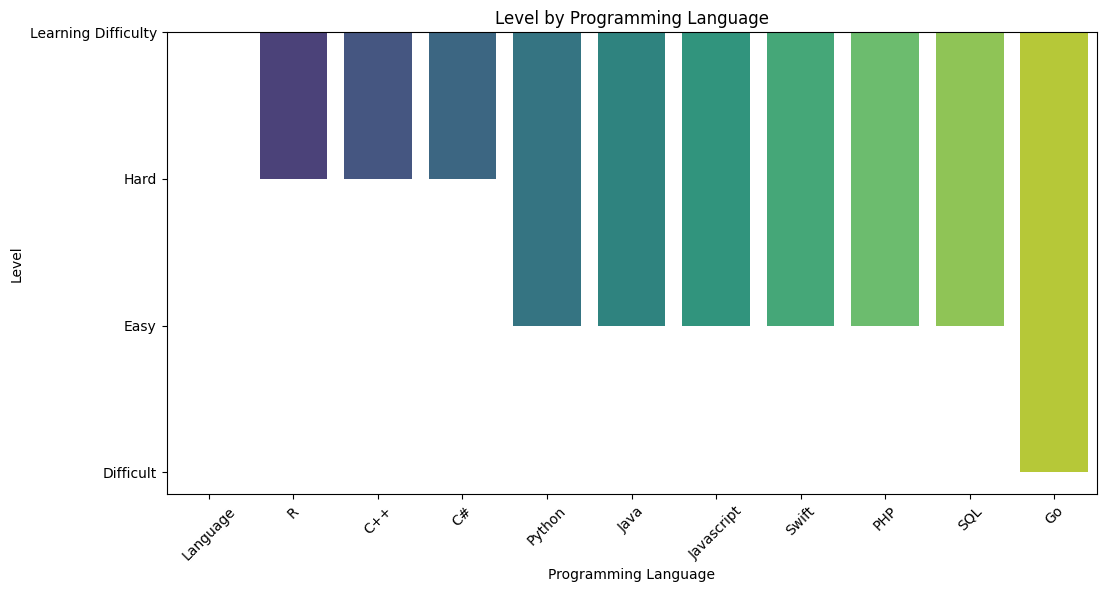

In [ ]:
# Sort the DataFrame by Average Annual Salary in descending order
df_sorted = data2.sort_values(by='Level', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='languages', y='Level', data=df_sorted, palette='viridis')
plt.title('Level by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Level')
plt.xticks(rotation=45)
plt.show()

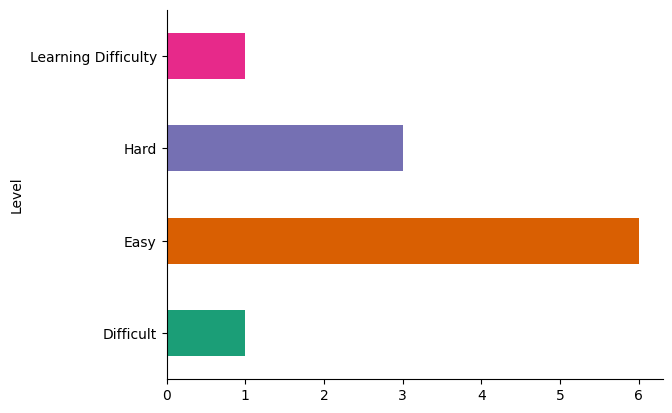

In [ ]:
# @title Level
data2.groupby('Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Opcion 2
for row in table.find_all('tr'): # En la fila de la tabla HTML se representa mediante la etiqueta <tr>
    # Obtenga todas las columnas de cada fila.
    cols = row.find_all('td') # En html, una columna está representada por la etiqueta <td>
    languages = cols[1].getText() # almacene el valor de la columna 1 como languages
    Level = cols[4].getText() # Guarde el valor de la columna 4 como Level
    print("{}--->{}".format(languages,Level))

Language--->Learning Difficulty
Python--->Easy
Java--->Easy
R--->Hard
Javascript--->Easy
Swift--->Easy
C++--->Hard
C#--->Hard
PHP--->Easy
SQL--->Easy
Go--->Difficult


In [ ]:
dataframe_list = pd.read_html(url, flavor='bs4')

In [ ]:
dataframe_list

[      0           1                                          2  \
 0   No.    Language                                 Created By   
 1     1      Python                           Guido van Rossum   
 2     2        Java                              James Gosling   
 3     3           R               Robert Gentleman, Ross Ihaka   
 4     4  Javascript                                   Netscape   
 5     5       Swift                                      Apple   
 6     6         C++                          Bjarne Stroustrup   
 7     7          C#                                  Microsoft   
 8     8         PHP                             Rasmus Lerdorf   
 9     9         SQL    Donald D. Chamberlin, Raymond F. Boyce.   
 10   10          Go  Robert Griesemer, Ken Thompson, Rob Pike.   
 
                         3                    4  
 0   Average Annual Salary  Learning Difficulty  
 1                $114,383                 Easy  
 2                $101,013                 E

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data2.to_excel('/content/drive/MyDrive/IBM/Certificado.IBM-Data-Analyst/Proyecto final de analista de datos de IBM/Modulo1.RecopilaciónDatos/RecopilacionDatosMedianteWebscraping/Programming_Languages.xlsx', index= False)
filepath ='/content/drive/MyDrive/IBM/Certificado.IBM-Data-Analyst/Proyecto final de analista de datos de IBM/Modulo1.RecopilaciónDatos/RecopilacionDatosMedianteWebscraping/Programming_Languages.xlsx'

df3 = pd.read_excel(filepath, header=0)

df3

Mounted at /content/drive


,Date,languages,name,salary,Level
0,No.,Language,Created By,Average Annual Salary,Learning Difficulty
1,1,Python,Guido van Rossum,"$114,383",Easy
2,2,Java,James Gosling,"$101,013",Easy
3,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
4,4,Javascript,Netscape,"$110,981",Easy
5,5,Swift,Apple,"$130,801",Easy
6,6,C++,Bjarne Stroustrup,"$113,865",Hard
7,7,C#,Microsoft,"$88,726",Hard
8,8,PHP,Rasmus Lerdorf,"$84,727",Easy
9,9,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793",Easy


In [ ]:
data2.to_csv('/content/drive/MyDrive/IBM/Certificado.IBM-Data-Analyst/Proyecto final de analista de datos de IBM/Modulo1.RecopilaciónDatos/RecopilacionDatosMedianteWebscraping/Programming_Languages.csv', index= False)
filepath ='/content/drive/MyDrive/IBM/Certificado.IBM-Data-Analyst/Proyecto final de analista de datos de IBM/Modulo1.RecopilaciónDatos/RecopilacionDatosMedianteWebscraping/Programming_Languages.csv'


df4 = pd.read_csv(filepath, header=0)

df4

,Date,languages,name,salary,Level
0,No.,Language,Created By,Average Annual Salary,Learning Difficulty
1,1,Python,Guido van Rossum,"$114,383",Easy
2,2,Java,James Gosling,"$101,013",Easy
3,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
4,4,Javascript,Netscape,"$110,981",Easy
5,5,Swift,Apple,"$130,801",Easy
6,6,C++,Bjarne Stroustrup,"$113,865",Hard
7,7,C#,Microsoft,"$88,726",Hard
8,8,PHP,Rasmus Lerdorf,"$84,727",Easy
9,9,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793",Easy


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
